## Libraries

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

# Image opening and resizing 

In [12]:
img = cv2.imread('clg.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1849, 3797, 3)
Resized dimension : (554, 1139, 3)


In [13]:
cv2.imshow("res image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Face detection

In [14]:
face = cv2.CascadeClassifier('haarcascade-frontalface.xml')

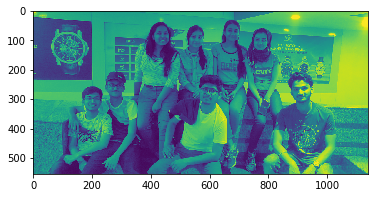

In [15]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [16]:
faces = face.detectMultiScale(gray, 1.3, 5)


In [30]:
cv2.putText?

Docstring:
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
.   @brief Draws a text string.
.   
.   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
.   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
.   example.
.   
.   @param img Image.
.   @param text Text string to be drawn.
.   @param org Bottom-left corner of the text string in the image.
.   @param fontFace Font type, see #HersheyFonts.
.   @param fontScale Font scale factor that is multiplied by the font-specific base size.
.   @param color Text color.
.   @param thickness Thickness of the lines used to draw a text.
.   @param lineType Line type. See #LineTypes
.   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
.   it is at the top-left corner.
Type:      builtin_function_or_method


In [37]:
cv2.putText?

Docstring:
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
.   @brief Draws a text string.
.   
.   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
.   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
.   example.
.   
.   @param img Image.
.   @param text Text string to be drawn.
.   @param org Bottom-left corner of the text string in the image.
.   @param fontFace Font type, see #HersheyFonts.
.   @param fontScale Font scale factor that is multiplied by the font-specific base size.
.   @param color Text color.
.   @param thickness Thickness of the lines used to draw a text.
.   @param lineType Line type. See #LineTypes
.   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
.   it is at the top-left corner.
Type:      builtin_function_or_method


In [17]:
if faces is ():
    print(" NO FACE DETECTED ! ")


In [42]:
def detect_faces(fix_img,counter):
    
    face_rects = face.detectMultiScale(fix_img)
    
    for (x,y,w,h) in faces:
        counter+=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
        cv2.putText(fix_img,'counter',(140,25), font, .5,(255,255,255),2,cv2.LINE_AA)
    cv2.destroyAllWindows()
    return fix_img,counter

In [43]:

counter = 0 
result1,result2 = detect_faces(gray,counter)

#plt.imshow(result)
cv2.imshow("final image",result1)
print("Count :",result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Count : 7


# Eye detection


In [12]:
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

In [10]:
def detect_eyes(fix_img):
    eye_rects = eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
    
    cv2.destroyAllWindows()
    return fix_img

In [11]:
result = detect_eyes(gray)
#plt.imshow(result)
cv2.imshow("final image",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Face and eye detection

In [20]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [21]:
img = cv2.imread('clg.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1849, 3797, 3)
Resized dimension : (554, 1139, 3)


In [22]:
cv2.imshow("res image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
face = cv2.CascadeClassifier('haarcascade-frontalface.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

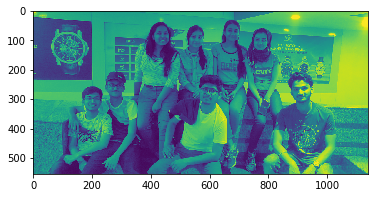

In [24]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [25]:
faces = face.detectMultiScale(gray, 1.3, 5)


In [26]:
if faces is ():
    print(" NO FACE DETECTED ! ")
    

In [27]:
def detect_face_eyes(fix_img):
        face_rects = face.detectMultiScale(fix_img)
        for (x,y,w,h) in face_rects:
            cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),5)
    
   
            eye_rects = eye_classifier.detectMultiScale(fix_img)
    
            for (ix,iy,iw,ih) in eye_rects:
                cv2.rectangle(fix_img,(ix,iy),(ix+iw,iy+ih),(0,0,0),2)
    
        cv2.destroyAllWindows()
        return fix_img

In [28]:
result = detect_face_eyes(gray)
#plt.imshow(result)
cv2.imshow("final image",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# people 

In [5]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [6]:
vid = cv2.VideoCapture('running.mp4')

In [7]:
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [8]:
while vid.isOpened():
    ret,frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    body = body_classifier.detectMultiScale(gray,1.2,3)
    
    if ret == True:
        for (x,y,w,h) in body:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),5)
            cv2.imshow("People",frame)
            
        if cv2.waitKey(1)==13:
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break
vid.release()
cv2.destroyAllWindows

<function destroyAllWindows>

## CARS

In [5]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [6]:
vid = cv2.VideoCapture('cars2.avi')

In [7]:
car_classifier = cv2.CascadeClassifier('haarcascade_car.xml')

In [8]:
while vid.isOpened():
    ret,frame = vid.read()
    
    cars = car_classifier.detectMultiScale(frame,1.3,2)
    
    if ret == True:
        for (x,y,w,h) in cars:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(111,111,110),5)
            cv2.imshow("cars",frame)
            
        if cv2.waitKey(1)==13:
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break
vid.release()
cv2.destroyAllWindows

<function destroyAllWindows>

## plates

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [6]:
img = cv2.imread('ciaz.jpg')

In [7]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax= fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
    

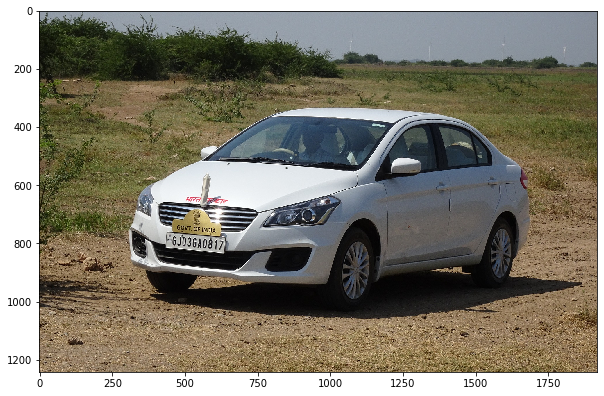

In [8]:
display(img)

In [16]:
img = cv2.imread('creta.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (510, 827, 3)
Resized dimension : (153, 248, 3)


In [17]:
cv2.imshow("car",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def plate_detector(img):
    plate_img = img.copy()
    car_classifier = cv2.CascadeClassifier('haarcascade_carplate.xml')
    
    plate_rects = car_classifier.detectMultiScale(plate_img,1.3,7)
    
    
    for (x,y,w,h) in plate_rects:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1]))
        plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,0),10)
    
    return plate_img

In [19]:
res = plate_detector(resized)
cv2.imshow("car",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

def extract_plate(img): # the function detects and perfors blurring on the number plate.
	plate_img = img.copy()
	
	#Loads the data required for detecting the license plates from cascade classifier.
	plate_cascade = cv2.CascadeClassifier('./indian_license_plate.xml')

	# detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
	plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 7)

	for (x,y,w,h) in plate_rect:
		a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) #parameter tuning
		plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
		# finally representing the detected contours by drawing rectangles around the edges.
		cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)
        
	return plate_img, plate # returning the processed image

In [20]:
## mouth detection 


In [43]:
img = cv2.imread('clg.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1849, 3797, 3)
Resized dimension : (554, 1139, 3)


In [44]:
cv2.imshow("G",resized)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [45]:
mouth_classifier = cv2.CascadeClassifier('haarcascade_mouth.xml')

In [46]:
if mouth_classifier.empty():
    print("NO Mouth Detected !")

In [47]:
mouth = mouth_classifier.detectMultiScale(resized,1.3,5)

In [48]:
def detect_mouth(fix_img):
    
    
    for (x,y,w,h) in mouth:
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
    
    cv2.destroyAllWindows()
    return fix_img

In [49]:
m = detect_mouth(resized)
cv2.imshow("mouth",m)
cv2.waitKey(0)
cv2.destroyAllWindows()